# Your Title Here

**Name(s)**: (your name(s) here)

**Website Link**: (your website link)

In [755]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import math

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

In [756]:
# TODO

data = pd.read_csv('outage_cleaned.csv')

## Step 2: Data Cleaning and Exploratory Data Analysis

In [757]:
# TODO
data = pd.read_csv('outage_cleaned.csv')
# Set the observation number to be the index of the dataset
data = data.set_index('OBS')
# Convert the OUTAGE.START.DATE and OUTAGE.START.TIME to datetime
data['OUTAGE.START.DATE'] = pd.to_datetime(data['OUTAGE.START.DATE'] + ' ' + data['OUTAGE.START.TIME'])
# Convert the OUTAGE.RESTORATION.DATE and OUTAGE.RESTORATION.TIME to datetime
data['OUTAGE.RESTORATION.DATE'] = pd.to_datetime(data['OUTAGE.RESTORATION.DATE'] + ' ' + data['OUTAGE.RESTORATION.TIME'])
# Drop the OUTAGE.START.TIME and OUTAGE.RESTORATION.TIME columns
data = data.drop(columns=['OUTAGE.START.TIME', 'OUTAGE.RESTORATION.TIME'])
# Drop the US state column as it is redundant
data = data.drop(columns=['U.S._STATE'])
data

C:\Users\sweek\AppData\Local\Temp\ipykernel_31564\524060891.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\sweek\AppData\Local\Temp\ipykernel_31564\524060891.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,YEAR,MONTH,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.RESTORATION.DATE,CAUSE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
OBS,,,,,,,,,,,,,,,,,,,,,
1,2011,7.0,MN,MRO,East North Central,-0.3,normal,2011-07-01 17:00:00,2011-07-03 20:00:00,severe weather,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
2,2014,5.0,MN,MRO,East North Central,-0.1,normal,2014-05-11 18:38:00,2014-05-11 18:39:00,intentional attack,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
3,2010,10.0,MN,MRO,East North Central,-1.5,cold,2010-10-26 20:00:00,2010-10-28 22:00:00,severe weather,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
4,2012,6.0,MN,MRO,East North Central,-0.1,normal,2012-06-19 04:30:00,2012-06-20 23:00:00,severe weather,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
5,2015,7.0,MN,MRO,East North Central,1.2,warm,2015-07-18 02:00:00,2015-07-19 07:00:00,severe weather,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.60,91.592666,8.407334,5.478743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,2011,12.0,ND,MRO,West North Central,-0.9,cold,2011-12-06 08:00:00,2011-12-06 20:00:00,public appeal,...,59.90,19.90,2192.2,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765
1531,2006,NaN,ND,MRO,West North Central,NaN,NaN,NaT,NaT,fuel supply emergency,...,59.90,19.90,2192.2,1868.2,3.9,0.27,0.10,97.599649,2.401765,2.401765
1532,2009,8.0,SD,RFC,West North Central,0.5,warm,2009-08-29 22:54:00,2009-08-29 23:53:00,islanding,...,56.65,26.73,2038.3,1905.4,4.7,0.30,0.15,98.307744,1.692256,1.692256


In [758]:
# Plot a boxplot of a numerical column against a categorical variable, excluding the top X% of values
def plot_against_categorical_var(categorical_var_col, column_name, exclude_top_pct=0.05):
    threshold = data[column_name].quantile(1 - exclude_top_pct)  # grab the threshold value for top X%
    filtered = data[data[column_name] <= threshold] # filter data to exclude top X%
    
    fig = px.box(filtered, x=categorical_var_col, y=column_name,
                title=f'{column_name} vs {categorical_var_col} (excluding top {exclude_top_pct*100:.0f}% values)') # use plotly express to create boxplot
    fig.show() # show the figure

# Plot a scatterplot of a numerical column against another numerical variable, excluding the top X% of values
def plot_against_numerical_var(numerical_var_col, column_name, exclude_top_pct=0.05):
    threshold = data[column_name].quantile(1 - exclude_top_pct) # grab the threshold value for top X%
    filtered = data[data[column_name] <= threshold] # filter data to exclude top X%
    
    fig = px.scatter(filtered, x=numerical_var_col, y=column_name, trendline='ols', trendline_color_override='red',
                    title=f'{column_name} vs {numerical_var_col} (excluding top {exclude_top_pct*100:.0f}% values)') # use plotly express to create scatterplot
    fig.show() # show the figure

# Plot bivariate analysis of a column against three metrics
def plot_bivariate(column, categorical = True, exclude_top_pct=0.05, save_folder="bivariate_analysis", df=data):
    metrics = ['OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED'] # metrics to plot against
    subplot_titles = metrics # titles for subplots

    os.makedirs(save_folder, exist_ok=True)  # ensure folder exists
    print(f"Plotting {column}...") # indicate start of plotting
    
    # Create 1 row, 3 columns
    fig = make_subplots(rows=1, cols=3, subplot_titles=subplot_titles) # create subplots with 1 row and 3 columns
    
    for i, metric in enumerate(metrics): # iterate over metrics
        # Filter out top fraction
        threshold = df[metric].quantile(1 - exclude_top_pct) # calculate threshold for top X%
        filtered = df[df[metric] <= threshold] # filter data to exclude top X%
        
        if categorical:
            # Boxplot for categorical x-axis
            for category in filtered[column].unique(): # iterate over unique categories
                fig.add_trace( # add boxplot trace for each category
                    go.Box(
                        y=filtered[filtered[column] == category][metric],
                        name=str(category),
                        boxmean='sd', # show mean and standard deviation
                        showlegend=(i==0)  # show legend only for first subplot
                    ), # add boxplot trace for each category
                    row=1, col=i+1 # specify row and column for subplot
                )
        else:
            # Scatterplot with line of best fit
            scatter_fig = px.scatter(filtered, x=column, y=metric) # create scatterplot using plotly express
            for trace in scatter_fig.data: # iterate over traces in scatterplot
                fig.add_trace(trace, row=1, col=i+1) # add scatterplot trace to subplot
    
    fig.update_layout(
        height=500, width=1800,
        title_text=f"Metrics vs {column} (excluding top {exclude_top_pct*100:.0f}% values)"
    ) # update layout of figure
    
    print(f"Finished plotting {column}.") # indicate end of plotting
    return fig

# Plot univariate analysis of a column - histogram for categorical, KDE for numerical
def plot_univariate(column_name, categorical=False, df=data):
    filtered = df[[column_name]].copy() # copy the specified column
    
    if categorical:
        # Categorical: histogram/bar chart
        fig = go.Figure() # create empty figure
        fig.add_trace( # add histogram trace
            go.Histogram( # histogram trace
                x=filtered[column_name],
                name=f'{column_name} counts',
            )
        ) # add histogram trace
        fig.update_layout( # update layout of figure
            title_text=f'Histogram of {column_name}',
            xaxis_title=column_name,
            yaxis_title='Count',
            width=600, height=400
        )
    else:
        values = filtered[column_name].values # get values of the column
        
        kde_fig = sns.kdeplot(values, bw_method='scott') # create KDE plot using seaborn
        kde_data = kde_fig.get_lines()[0].get_data() # get KDE data points
        x_grid = kde_data[0] # x values of KDE
        kde_values = kde_data[1] # y values of KDE
        kde_fig.figure.clear()  # clear the seaborn figure

        fig = go.Figure() # create empty figure
        fig.add_trace( # add KDE trace
            go.Scatter( # scatter trace for KDE
                x=x_grid,
                y=kde_values,
                fill='tozeroy',
                name='KDE'
            )
        )
        fig.update_layout( # update layout of figure
            width=600, height=400,
            title_text=f'KDE of {column_name}',
            xaxis_title=column_name,
            yaxis_title='Density',
            showlegend=False
        )
    
    return fig

# Save figure to specified folder
def save_figure(fig, column_name, save_folder="univariate_analysis"):
    os.makedirs(save_folder, exist_ok=True) # ensure folder exists
    save_path = os.path.join(save_folder, f"{column_name}.png") # construct save path
    fig.write_image(save_path) # save figure as PNG
    print(f"Saved figure to {save_path}") # indicate where figure was saved


In [759]:
def save_combined_univariate(columns_to_plot, save_path="univariate_analysis/combined.png", cols_per_row=5):
    n_cols = cols_per_row # number of columns per row
    n_rows = math.ceil(len(columns_to_plot) / n_cols) # calculate number of rows needed
    
    # Create subplot titles
    subplot_titles = [col for col, _ in columns_to_plot]
    
    fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=subplot_titles) # create subplots
    
    for i, (column_name, categorical) in enumerate(columns_to_plot): # iterate over columns to plot
        row = i // n_cols + 1 # calculate row index
        col = i % n_cols + 1 # calculate column index
        
        # Create figure for this column
        col_fig = plot_univariate(column_name, categorical=categorical)
        
        # Add traces to the combined figure
        for trace in col_fig.data:
            fig.add_trace(trace, row=row, col=col)
        
        # Adjust x-axis and y-axis titles for each subplot
        fig.update_xaxes(title_text=column_name, row=row, col=col)
        fig.update_yaxes(title_text='Count' if categorical else 'Density', row=row, col=col)
    
    fig.update_layout(
        height=n_rows * 400,  # 400px per row
        width=n_cols * 600,   # 600px per column
        title_text="Combined Univariate Analysis",
        showlegend=False
    )
    
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.write_image(save_path)
    print(f"Saved combined figure to {save_path}")

In [760]:
# Specify columns to plot
columns_to_plot = [
    # Time of year
    ('MONTH', True),

    # Geographic region information
    ('NERC.REGION', True),
    ('POSTAL.CODE', True),

    # Regional Climate Information
    ('CLIMATE.REGION', True),
    ('CLIMATE.CATEGORY', True),
    ('ANOMALY.LEVEL', False),

    # Event causes
    ('CAUSE.CATEGORY', True),
    ('HURRICANE.NAMES', True),

    # Electricity price information
    ('RES.PRICE', False),
    ('COM.PRICE', False),
    ('IND.PRICE', False),

    # Electricity consumption information
    ('RES.SALES', False),
    ('COM.SALES', False),
    ('IND.SALES', False),
    ('RES.PERCEN', False),
    ('COM.PERCEN', False),
    ('IND.PERCEN', False),

    # Customers served information
    ('RES.CUSTOMERS', False),
    ('COM.CUSTOMERS', False),
    ('IND.CUSTOMERS', False),

    # Regional economic output information
    ('PC.REALGSP.STATE', False),
    ('PC.REALGSP.USA', False),
    ('PC.REALGSP.REL', False),
    ('PC.REALGSP.CHANGE', False),
    ('UTIL.REALGSP', False),
    ('TOTAL.REALGSP', False),
    ('UTIL.CONTRI', False),
    ('PI.UTIL.OFUSA', False),

    # Population information
    ('POPULATION', False),
    ('POPPCT_URBAN', False),
    ('POPPCT_UC', False),
    ('POPDEN_URBAN', False),
    ('POPDEN_UC', False),
    ('POPDEN_RURAL', False),

    # Land information
    ('AREAPCT_URBAN', False),
    ('AREAPCT_UC', False),
    ('PCT_LAND', False),
    ('PCT_WATER_TOT', False),
    ('PCT_WATER_INLAND', False)
]

# Specify output columns to plot
output_columns = [('OUTAGE.DURATION', False), ('DEMAND.LOSS.MW', False), ('CUSTOMERS.AFFECTED', False)]

# Plot and save bivariate and univariate analyses
# for col, is_categorical in columns_to_plot:
#     fig1 = plot_bivariate(col, categorical=is_categorical)
#     fig2 = plot_univariate(col, categorical=is_categorical)
#     save_figure(fig1, col, save_folder="bivariate_analysis")
#     save_figure(fig2, col, save_folder="univariate_analysis")

# for col, is_categorical in output_columns:
#     fig = plot_univariate(col, categorical=is_categorical)
#     save_figure(fig, col, save_folder="univariate_analysis")

# save_combined_univariate(columns_to_plot + output_columns, save_path="univariate_analysis/all_univariate.png", cols_per_row=5)

In [761]:
def pivot_and_heatmap(df, index_col, columns_col, values_col, aggfunc='mean', exclude_top_pct=0.10): # function to create pivot table and heatmap
    threshold = df[values_col].quantile(1 - exclude_top_pct) # calculate threshold for top X%
    filtered = df[df[values_col] <= threshold] # filter data to exclude top X%
    pivot_table = filtered.pivot_table(index=index_col, columns=columns_col, values=values_col, aggfunc=aggfunc) # create pivot table
    pivot_table.fillna(0, inplace=True) # fill NaN values with 0
    fig = px.imshow( # create heatmap using plotly express
        pivot_table,
        labels=dict(x=columns_col, y=index_col, color=values_col),
        x=pivot_table.columns,
        y=pivot_table.index,
        text_auto=True,
        aspect='auto',
        color_continuous_scale='Viridis'
    )
    fig.update_layout( # update layout of figure
        title=f'{values_col} {aggfunc} by {index_col} and {columns_col}, excluding top {exclude_top_pct*100:.0f}%',
        xaxis_title=columns_col,
        yaxis_title=index_col,
        height=600,
        width=900
    )
    return fig # return the heatmap figure

save_figure( # plot and save heatmap of mean outage duration by cause category and climate region
    pivot_and_heatmap(data, index_col='CAUSE.CATEGORY', columns_col='CLIMATE.REGION', values_col='OUTAGE.DURATION', aggfunc='mean', exclude_top_pct=0.10),
    'heatmap_mean_outage_duration',
    save_folder='heatmap_analysis'
)
save_figure( # plot and save heatmap of count of outages by cause category and climate region
    pivot_and_heatmap(data, index_col='CAUSE.CATEGORY', columns_col='CLIMATE.REGION', values_col='OUTAGE.DURATION', aggfunc='count', exclude_top_pct=0),
    'heatmap_count_outage_duration',
    save_folder='heatmap_analysis'
)

Saved figure to heatmap_analysis\heatmap_mean_outage_duration.png
Saved figure to heatmap_analysis\heatmap_count_outage_duration.png


## Step 3: Assessment of Missingness

In [762]:
missing_counts = data.isnull().sum() # count missing values per column in a series
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False) # filter to only columns with missing values and sort descending

def get_necessary_columns(data, col_list): # function to get necessary columns from data
    return data[col_list]

def shuffle_missing(data, shuffle_column): # function to shuffle a column in the data
    data_shuffled = data.assign(shuffled = np.random.permutation(data[shuffle_column]))
    return data_shuffled

def calculate_categorical_proportions(data, categorical_column, target_column): # function to calculate proportions of categorical variable
    groupby_filtered = data.groupby(categorical_column)[target_column].size().fillna(0) # group by categorical column and count target column
    groupby_filtered = groupby_filtered / groupby_filtered.sum() # normalize to get proportions
    return groupby_filtered 

def calculate_tvd(proportions1, proportions2): # function to calculate total variation distance between two distributions
    return (proportions1 - proportions2).abs().sum() / 2

def calculate_tvd_between_nulls(data, categorical_column, target_column): # function to calculate TVD between null and non-null distributions
    groupby_not_null = data.groupby(categorical_column)[target_column].size().fillna(0) # group by categorical column and count target column for non-null values
    groupby_not_null = groupby_not_null / groupby_not_null.sum() # normalize to get proportions for non-null values
    data_null = data[data[target_column].isnull()] # filter data to only null target column values
    groupby_null = data_null.groupby(categorical_column)[target_column].size().fillna(0) # group by categorical column and count target column for null values
    groupby_null = groupby_null / groupby_null.sum() # normalize to get proportions for null values
    tvd = calculate_tvd(groupby_not_null, groupby_null)
    return tvd

In [763]:
def perform_missingness_permutation_test(data, categorical_column, target_column, n_repetitions=1000): # function to perform permutation test for missingness
    filtered_data = get_necessary_columns(data, [categorical_column, target_column]) # filter data to necessary columns
    observed_value = calculate_tvd_between_nulls(filtered_data, categorical_column, target_column) # calculate observed TVD
    tvds = [] # list to store TVDs from permutations

    for _ in range(n_repetitions):  # perform permutations
        shuffled_data = shuffle_missing(filtered_data, target_column) # shuffle target column to break association
        tvd = calculate_tvd_between_nulls(shuffled_data, categorical_column, 'shuffled') # calculate TVD for shuffled data
        tvds.append(tvd) # store TVD from this permutation
    
    return observed_value, tvds # return observed TVD and list of TVDs from permutations

def calculate_p_value(observed_statistic, permuted_vals): # function to calculate p-value from permutation test
    p_value = np.mean(np.array(permuted_vals) >= observed_statistic) # calculate p-value as proportion of permuted values >= observed statistic
    return p_value

def plot_permutation_test_distribution(permuted_vals, observed_statistic, categorical_column_name, target_column_name, p_value=None): # function to plot permutation test distribution
    title = (
        f'Empirical Distribution of the TVD of {categorical_column_name} Proportion Differences<br>'
        f'Between Null and Not Null Values of {target_column_name}'
    ) # title for the plot
    fig = px.histogram(pd.DataFrame(permuted_vals), x=0, nbins=50, histnorm='probability', 
                        title=title) # create histogram of permuted TVDs
    fig.add_vline(x=observed_statistic, line_color='red', line_width=1, opacity=1) # add vertical line for observed statistic
    fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed_statistic, 2)}</span><br><span style="color:red">P-value = {round(p_value, 3)}</span>',
                   x=1.2 * observed_statistic, showarrow=False, y=0.05) # add annotation for observed statistic and p-value
    return fig

In [764]:
observed_statistic, permuted_vals = perform_missingness_permutation_test(data, 'CAUSE.CATEGORY', 'OUTAGE.DURATION', n_repetitions=1000) # perform permutation test
p_value = calculate_p_value(observed_statistic, permuted_vals) # calculate p-value
print(f'P-value: {p_value}')
fig = plot_permutation_test_distribution(permuted_vals, observed_statistic, 'CAUSE.CATEGORY', 'OUTAGE.DURATION', p_value=p_value) # plot permutation test distribution
fig.show()

P-value: 0.001


In [765]:
observed_statistic, permuted_vals = perform_missingness_permutation_test(data, 'MONTH', 'OUTAGE.DURATION', n_repetitions=1000) # perform permutation test
p_value = calculate_p_value(observed_statistic, permuted_vals) # calculate p-value
print(f'P-value: {p_value}')
fig = plot_permutation_test_distribution(permuted_vals, observed_statistic, 'MONTH', 'OUTAGE.DURATION', p_value=p_value) # plot permutation test distribution
fig.show()

P-value: 0.103


## Step 4: Hypothesis Testing

In [766]:
# Define a mapping from detailed climate regions to 'North' and 'Not North'
climate_region_map = {'North': ['Northeast', 'East North Central', 'Northwest', 'West North Central'], 'Not North': ['South', 'West', 'Central', 'Southeast', 'Southwest']}
# Reverse the map to easily map each region to its bin
bin_map = {region: group for group, regions in climate_region_map.items() for region in regions}
# Map the CLIMATE.REGION to the binned version
data['CLIMATE.REGION.BINNED'] = data['CLIMATE.REGION'].map(bin_map)
# Determine the counts in each bin for sampling later on
binned_vals = data['CLIMATE.REGION.BINNED'].value_counts()
# Determine the observed mean for the 'North' bin
observed_mean = data.loc[data['CLIMATE.REGION.BINNED'] == 'North', 'OUTAGE.DURATION'].mean()
# Perform permutation test
n_repetitions = 1000
permuted_means = []
for _ in range(n_repetitions):
    sample_mean = data['OUTAGE.DURATION'].sample(n=binned_vals['North']).mean()
    permuted_means.append(sample_mean)
# Calculate p-value
p_value = calculate_p_value(observed_mean, permuted_means)
print(f'P-value: {p_value}')
# Plot the hypothesis test distribution
title = (
    f'Empirical Distribution of the Mean OUTAGE.DURATION<br>'
    f'For Random Samples of Size {binned_vals["North"]} from the Full Dataset'
)
fig = px.histogram(pd.DataFrame(permuted_means), x=0, nbins=50, histnorm='probability', 
                    title=title)
fig.add_vline(x=observed_mean, line_color='red', line_width=1, opacity=1)
fig.add_annotation(text=f'<span style="color:red">Observed Mean for NORTH = {round(observed_mean, 2)}</span><br><span style="color:red">P-value = {round(p_value, 3)}</span>',
                   x=1.2 * observed_mean, showarrow=False, y=0.05)

P-value: 0.004


## Step 5: Framing a Prediction Problem

In [767]:
# TODO

## Step 6: Baseline Model

In [768]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [769]:
# Part 1 - X data preparation. Get columns to be used in the model, define categorical and numerical columns
climate_relevant_columns = ['POSTAL.CODE', 'NERC.REGION',
                    'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
                    'HURRICANE.NAMES', 'PCT_LAND', 'PCT_WATER_TOT', 'PCT_WATER_INLAND'] # columns to use for modeling
model_data = data[climate_relevant_columns] # subset data to only model columns
categorical_cols = model_data.select_dtypes(include=['object']).columns.tolist() # get categorical columns - cannot use these in the base model
numerical_cols = model_data.select_dtypes(include=['number']).columns.tolist() # get numerical columns

In [770]:
# Part 2 - y data preparation - cause of the outage
y = data['CAUSE.CATEGORY']

In [771]:
# Part 3 - define the model, Decision Tree
dt = DecisionTreeClassifier() # create pipeline with preprocessing and decision tree classifier model

In [772]:
# Part 4 - split data into training and testing sets
X = model_data[numerical_cols] # features - cannot use categorical columns in the base model
y = y # target variable defined above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into training and testing sets

In [773]:
import warnings
# since sklearn OneHotEncoder sometimes raises warnings about unknown categories during transform, we can ignore those for cleaner output
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.preprocessing._encoders")

Accuracy: 0.5602605863192183


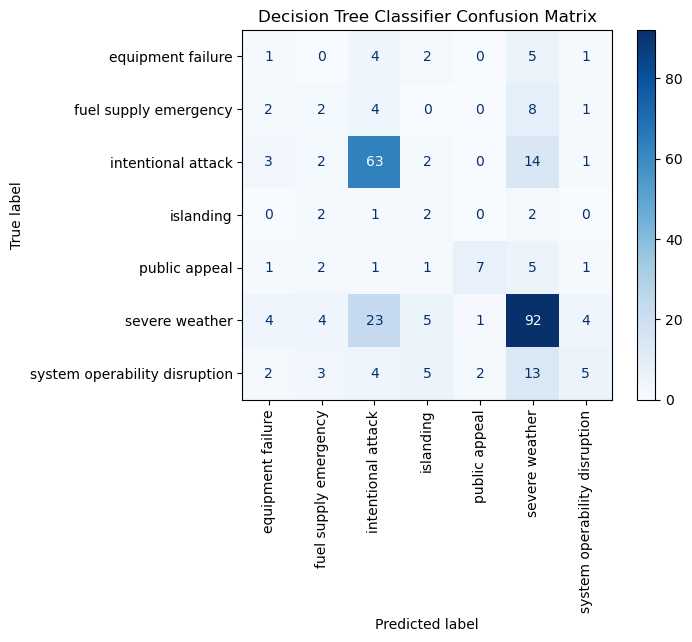

In [774]:
dt.fit(X_train, y_train) # fit the pipeline on training data

accuracy = (dt.predict(X_test) == y_test).mean()
print(f'Accuracy: {accuracy}')
cm = confusion_matrix(y_test, dt.predict(X_test), labels=dt.classes_) # compute confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_) #
disp.plot(cmap='Blues', xticks_rotation='vertical') # plot confusion matrix
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

## Step 7: Final Model

In [775]:
# Step 1 - re-evaluate the columns that we are using in the model and modify them as necessary

# Step 1.1 - add in new features from data
# Add in the year and the month columns back into the model - they play a role in seasonal and temporal patterns and are therefore climate relevant
climate_relevant_columns = ['YEAR', 'MONTH', 'POSTAL.CODE', 'NERC.REGION',
                    'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
                    'HURRICANE.NAMES', 'PCT_LAND', 'PCT_WATER_TOT', 'PCT_WATER_INLAND']
model_data_final = data[climate_relevant_columns] # subset data to only model columns

# Step 1.2 - analyze numerical columns and decide which ones to remove based on correlation
numerical_cols = model_data_final.select_dtypes(include=['number']).columns.tolist() # select all numerical columns 
correlation_matrix = model_data_final[numerical_cols].corr().abs() # compute absolute correlation matrix
print(correlation_matrix)
# It is shown that PCT_LAND has a high correlation with PCT_WATER_TOT (100 - PCT_LAND), so we will remove that column
model_data_final = model_data_final.drop(columns=['PCT_WATER_TOT'])

# Step 1.3 - analyze categorical columns and determine edits
# The name of a hurricane does not provide useful information, but whether or not there was a hurricane does
model_data_final['HURRICANE_PRESENT'] = model_data_final['HURRICANE.NAMES'].apply(lambda x: 0 if x == 'NONE' else 1) # create binary feature for hurricane presence
model_data_final = model_data_final.drop(columns=['HURRICANE.NAMES']) # drop the original

                      YEAR     MONTH  ANOMALY.LEVEL  PCT_LAND  PCT_WATER_TOT  \
YEAR              1.000000  0.145328       0.152132  0.083103       0.083108   
MONTH             0.145328  1.000000       0.122687  0.056710       0.056706   
ANOMALY.LEVEL     0.152132  0.122687       1.000000  0.032730       0.032731   
PCT_LAND          0.083103  0.056710       0.032730  1.000000       1.000000   
PCT_WATER_TOT     0.083108  0.056706       0.032731  1.000000       1.000000   
PCT_WATER_INLAND  0.065317  0.004792       0.038350  0.348273       0.348262   

                  PCT_WATER_INLAND  
YEAR                      0.065317  
MONTH                     0.004792  
ANOMALY.LEVEL             0.038350  
PCT_LAND                  0.348273  
PCT_WATER_TOT             0.348262  
PCT_WATER_INLAND          1.000000  


In [776]:
# Part 2 - fill in missing values with imputation strategies
missing_counts_model = model_data_final.isnull().sum() # count missing values per column in model data
missing_counts_model = missing_counts_model[missing_counts_model > 0].sort_values(ascending=False) # filter to only columns with missing values and sort descending

def prob_impute_categorical(series): # function to impute missing categorical values based on observed distribution
    series = series.copy() # create a copy of the series to avoid modifying the original
    num_null = series.isnull().sum() # count number of null values
    fill_values = np.random.choice(series.dropna(), size=num_null, replace=True) # sample from non-null values
    series[series.isnull()] = fill_values # fill null values with sampled values
    return series

def prob_impute_numerical(series): # function to impute missing numerical values with mean
    return series.fillna(series.mean())

for col in model_data_final.columns: # iterate over columns in model data and impute missing values to prevent later errors
    if model_data_final[col].dtype == 'object':
        model_data_final[col] = prob_impute_categorical(model_data_final[col])
    else:
        model_data_final[col] = prob_impute_numerical(model_data_final[col])

In [777]:
# Part 3 - redefine X and y for modeling
X = model_data_final # features
y = data['CAUSE.CATEGORY'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split data into training and testing sets

In [778]:
# Part 4 - create the model pipeline with preprocessing and decision tree classifier
col_trans = make_column_transformer( # create column transformer for preprocessing
    (OneHotEncoder(drop='first', handle_unknown='ignore'), model_data_final.select_dtypes(include=['object', 'category']).columns.tolist()), # one-hot encode categorical columns because there are no columns that are ordinal (have an inherent order to them)
    (StandardScaler(), model_data_final.select_dtypes(include=['number']).columns.tolist()), # standard scale numerical columns to place them all on the same scale and prevent any one feature from dominating due to scale
    remainder='passthrough', # pass through any remaining columns without transformation
)

pipeline = make_pipeline( # create pipeline with preprocessing and decision tree classifier model
    col_trans,
    DecisionTreeClassifier()
)

# Hyperparameter tuning with GridSearchCV
# I plan to tune two hyperparameters of the decision tree: max_depth and min_samples_split
# Max_depth controls the maximum depth of the tree, and I hope to prevent overfitting by limiting it and finding the optimal depth for maximum accuracy
# Min_samples_split controls the minimum number of samples required to split an internal node, and I hope to prevent overfitting by requiring a higher number of samples to make splits
param_grid_dt = {
    'decisiontreeclassifier__max_depth': list(range(5, 45)) + [None],
    'decisiontreeclassifier__min_samples_split': list(range(2, 10)),
}

dt_grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
)

Best Decision Tree Model Accuracy: 0.6188925081433225
Best Hyperparameters: {'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_split': 6}


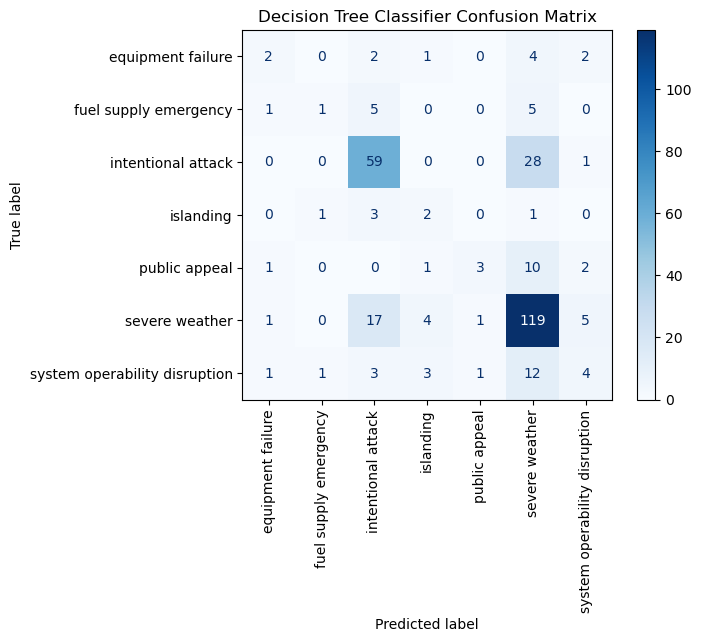

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.017529,0.000909,0.007760,0.000673,8,6,"{'decisiontreeclassifier__max_depth': 8, 'deci...",0.662602,0.609756,0.722449,0.693878,0.632653,0.664267,0.040585,1
25,0.017738,0.001089,0.007108,0.001115,8,3,"{'decisiontreeclassifier__max_depth': 8, 'deci...",0.670732,0.626016,0.718367,0.673469,0.632653,0.664248,0.033214,2
26,0.017431,0.000999,0.006904,0.000493,8,4,"{'decisiontreeclassifier__max_depth': 8, 'deci...",0.674797,0.621951,0.718367,0.673469,0.620408,0.661799,0.036895,3
27,0.017596,0.001143,0.006709,0.000744,8,5,"{'decisiontreeclassifier__max_depth': 8, 'deci...",0.666667,0.609756,0.714286,0.689796,0.620408,0.660183,0.039927,4
68,0.019830,0.001308,0.006104,0.000210,13,6,"{'decisiontreeclassifier__max_depth': 13, 'dec...",0.666667,0.638211,0.693878,0.644898,0.653061,0.659343,0.019702,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.019327,0.003073,0.008326,0.002065,5,2,"{'decisiontreeclassifier__max_depth': 5, 'deci...",0.613821,0.613821,0.693878,0.640816,0.608163,0.634100,0.031980,323
218,0.022923,0.001207,0.007670,0.001102,32,4,"{'decisiontreeclassifier__max_depth': 32, 'dec...",0.634146,0.626016,0.669388,0.608163,0.632653,0.634073,0.019927,325
3,0.014802,0.001806,0.007116,0.001035,5,5,"{'decisiontreeclassifier__max_depth': 5, 'deci...",0.613821,0.609756,0.693878,0.640816,0.608163,0.633287,0.032532,326
1,0.015729,0.001706,0.006812,0.000676,5,3,"{'decisiontreeclassifier__max_depth': 5, 'deci...",0.613821,0.609756,0.693878,0.640816,0.608163,0.633287,0.032532,326


In [779]:
import matplotlib.pyplot as plt

dt_grid_search.fit(X_train, y_train) # fit the grid search on training data
best_dt_model = dt_grid_search.best_estimator_ # get the best model from grid search
all_results = pd.DataFrame(dt_grid_search.cv_results_) # convert cv results to dataframe for easier analysis
accuracy = (best_dt_model.predict(X_test) == y_test).mean()
print(f'Best Decision Tree Model Accuracy: {accuracy}')
print(f'Best Hyperparameters: {dt_grid_search.best_params_}')
all_results_sorted = all_results.sort_values(by='mean_test_score', ascending=False) # sort results by mean test score
cm = confusion_matrix(y_test, best_dt_model.predict(X_test), labels=best_dt_model.classes_) # compute confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_model.classes_) #
disp.plot(cmap='Blues', xticks_rotation='vertical') # plot confusion matrix
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()
all_results_sorted

## Step 8: Fairness Analysis

In [ ]:
# TODO